In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import kagglehub


In [2]:

path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
df = pd.read_csv(path + '/Student_Performance.csv')
df.head(-5)


Using Colab cache for faster access to the 'student-performance-multiple-linear-regression' dataset.


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9990,9,43,No,7,4,40.0
9991,5,97,Yes,7,4,83.0
9992,9,52,No,9,7,50.0
9993,9,58,Yes,7,7,55.0


In [3]:
X = X = df[[
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced"
]].values

y = df[['Performance Index']].values

In [4]:
def compute_cost_linear_reg(X,y,w,b):

  m = X.shape[0]
  total_cost = 0

  for i in range(m):
    f_wb_i = np.dot(X[i],w)+b
    total_cost += (f_wb_i-y[i])**2

  total_cost = total_cost/(2*m)

  return total_cost

In [5]:
def compute_gradient_linear_reg(X,y,w,b):

  m,n = X.shape
  dj_dw = np.zeros(n)
  dj_db = 0

  for i in range(m):
    dj_dw += (np.dot(X[i],w)+b - y[i])*X[i]
    dj_db += np.dot(X[i],w)+b-y[i]

  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw , dj_db


In [6]:
def compute_gradient_descent(X,y,w_in,b_in,alpha,num_iters,compute_cost_linear_reg,compute_gradient_linear_reg):

  cost_history = []
  param_history = []
  w = w_in
  b = b_in

  for i in range(num_iters):

    dj_dw , dj_db = compute_gradient_linear_reg(X,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    if i < 100000 :
      cost_history.append(compute_cost_linear_reg(X,y,w,b))
      param_history.append([w,b])

    if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {float(cost_history[-1]):0.2e} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
                  f"w: {w}, b:{b}")
  return w, b, cost_history, param_history


In [11]:
def plot_cost_i_w(X, y, cost_history, param_history):

    ws = np.array([p[0] for p in param_history])


    w0_min = ws[:,0].min()
    w0_max = ws[:,0].max()
    w0_range = np.linspace(w0_min, w0_max, 50)

    w_fixed = ws[-1].copy()
    b_fixed = param_history[-1][1]

    costs_w0 = []
    for w0 in w0_range:
        w_temp = w_fixed.copy()
        w_temp[0] = w0
        costs_w0.append(compute_cost_linear_reg(X, y, w_temp, b_fixed))


    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    ax[0].plot(cost_history)
    ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("Iteration")
    ax[0].set_ylabel("Cost")

    ax[1].plot(w0_range, costs_w0, label="Cost curve")
    ax[1].plot(ws[:,0], cost_history, 'o-', label="Gradient Descent path")
    ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]")
    ax[1].set_ylabel("Cost")
    ax[1].legend()

    plt.show()


In [8]:
w_in = np.zeros(X.shape[1])
b_in = 0
alpha = 0.0001
num_iters =50
w_final , b_final ,cost_history , param_history = compute_gradient_descent(X,y,w_in,b_in,alpha,num_iters,compute_cost_linear_reg,compute_gradient_linear_reg)

/tmp/ipython-input-1893559452.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(cost_history[-1]):0.2e} ",


Iteration    0: Cost 4.21e+02  dj_dw: [ -294.3221 -4140.0412  -362.2183  -255.4952], dj_db: [-55.2248]   w: [0.02943221 0.41400412 0.03622183 0.02554952], b:[0.00552248]
Iteration    5: Cost 3.65e+01  dj_dw: [ -20.94613715 -104.31151823   -4.28736228   -3.82298406], dj_db: [-0.46661458]   w: [0.06152204 0.78518914 0.0666601  0.04735517], b:[0.01008458]
Iteration   10: Cost 3.62e+01  dj_dw: [-13.98941439  -2.33206501   4.75498437   2.5298447 ], dj_db: [0.91780496]   w: [0.0690727  0.79441645 0.06499711 0.04659159], b:[0.0097352]
Iteration   15: Cost 3.61e+01  dj_dw: [-13.76524511   0.24230392   4.98095095   2.68349997], dj_db: [0.95347414]   w: [0.07597904 0.79449848 0.06252418 0.04526114], b:[0.00926137]
Iteration   20: Cost 3.60e+01  dj_dw: [-13.71139663   0.30474171   4.98409611   2.68050302], dj_db: [0.955055]   w: [0.08284497 0.79435072 0.06003206 0.04391979], b:[0.00878405]
Iteration   25: Cost 3.58e+01  dj_dw: [-13.6620418    0.30371936   4.98157767   2.67354736], dj_db: [0.95576

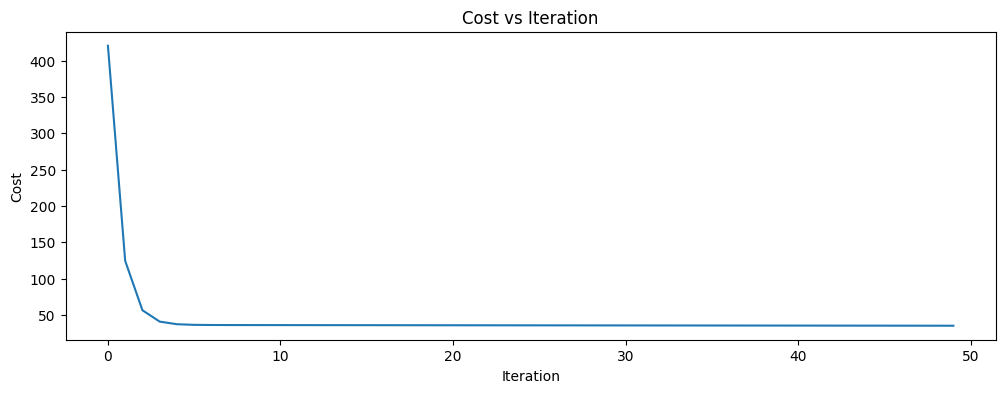

In [10]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(cost_history)
ax.set_title("Cost vs Iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

plt.show()

In [12]:
w_in = np.zeros(X.shape[1])
b_in = 0
alpha = 0.001
num_iters =50
w_final , b_final ,cost_history , param_history = compute_gradient_descent(X,y,w_in,b_in,alpha,num_iters,compute_cost_linear_reg,compute_gradient_linear_reg)

/tmp/ipython-input-1893559452.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(cost_history[-1]):0.2e} ",


Iteration    0: Cost 2.97e+04  dj_dw: [ -294.3221 -4140.0412  -362.2183  -255.4952], dj_db: [-55.2248]   w: [0.2943221 4.1400412 0.3622183 0.2554952], b:[0.0552248]
Iteration    5: Cost 5.16e+10  dj_dw: [ 369946.57715088 5462561.08015917  484485.38230321  340662.8170099 ], dj_db: [74117.86808388]   w: [ -298.78677517 -4412.88087784  -391.41289711  -275.21520624], b:[-59.8803918]
Iteration   10: Cost 8.98e+16  dj_dw: [-4.88104841e+08 -7.20700167e+09 -6.39196755e+08 -4.49448264e+08], dj_db: [-97785764.14029272]   w: [ 394382.19600704 5823159.11587061  516462.21477516  363148.04434695], b:[79009.55483757]
Iteration   15: Cost 1.56e+23  dj_dw: [6.43978612e+11 9.50852084e+12 8.43320979e+11 5.92977274e+11], dj_db: [1.2901315e+11]   w: [-5.20325869e+08 -7.68275419e+09 -6.81391764e+08 -4.79117490e+08], b:[-1.04240852e+08]
Iteration   20: Cost 2.72e+29  dj_dw: [-8.49629891e+14 -1.25450184e+16 -1.11263123e+15 -7.82341538e+14], dj_db: [-1.7021284e+14]   w: [6.86489278e+11 1.01362025e+13 8.9899074

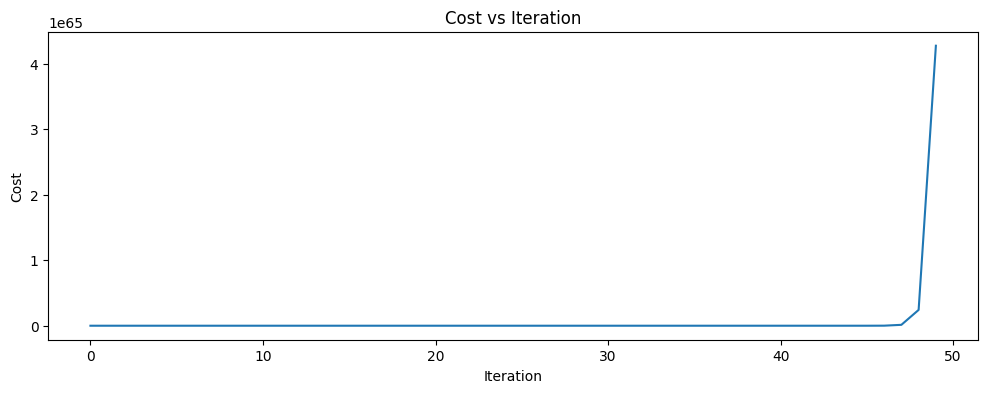

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(cost_history)
ax.set_title("Cost vs Iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

plt.show()

In [14]:
w_in = np.zeros(X.shape[1])
b_in = 0
alpha = 0.0001
num_iters =10
w_final , b_final ,cost_history , param_history = compute_gradient_descent(X,y,w_in,b_in,alpha,num_iters,compute_cost_linear_reg,compute_gradient_linear_reg)

/tmp/ipython-input-1893559452.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(cost_history[-1]):0.2e} ",


Iteration    0: Cost 4.21e+02  dj_dw: [ -294.3221 -4140.0412  -362.2183  -255.4952], dj_db: [-55.2248]   w: [0.02943221 0.41400412 0.03622183 0.02554952], b:[0.00552248]
Iteration    1: Cost 1.25e+02  dj_dw: [ -148.27467062 -1983.75935949  -170.97578958  -121.02496469], dj_db: [-25.96786812]   w: [0.04425968 0.61238006 0.05331941 0.03765202], b:[0.00811927]
Iteration    2: Cost 5.66e+01  dj_dw: [ -78.2829564  -950.46089715  -79.33188888  -56.58703354], dj_db: [-11.94775672]   w: [0.05208797 0.70742615 0.0612526  0.04331072], b:[0.00931404]
Iteration    3: Cost 4.10e+01  dj_dw: [ -44.73744444 -455.30049039  -35.41603481  -25.70885828], dj_db: [-5.2291898]   w: [0.05656172 0.75295619 0.0647942  0.04588161], b:[0.00983696]
Iteration    4: Cost 3.74e+01  dj_dw: [ -28.65710018 -218.01795813  -14.37164929  -10.91265018], dj_db: [-2.00955186]   w: [0.05942743 0.77475799 0.06623137 0.04697287], b:[0.01003792]
Iteration    5: Cost 3.65e+01  dj_dw: [ -20.94613715 -104.31151823   -4.28736228   -3

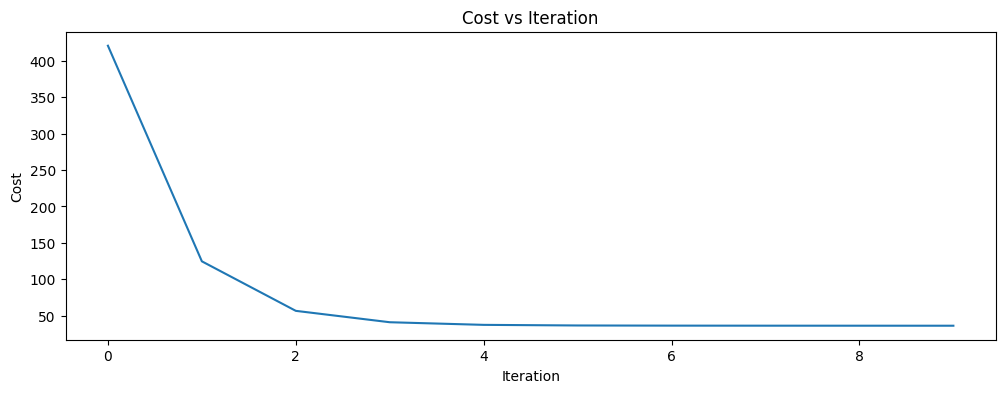

In [15]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(cost_history)
ax.set_title("Cost vs Iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

plt.show()